# Documentation of the project Interaction by Facial Expressions
**Group members:** Lea Krawczyk, Thi Mai Linh Nguyen, Sebastian Vittinghoff

# Emotion Detection with DeepFace (16.01.2024)

Our project uses [DeepFace](https://github.com/serengil/deepface) to detect changes in facial expressions and then determine which emotion is the most dominant in an user's face.

## DeepFace

DeepFace is a framework that can be used for face recognition and facial attribute analysis (age, gender, emotion, race). For our project we only use the function of recognising emotions.
Before an emotion can be determined a face needs to be detected first. DeepFace can use different face detectors in the backend: OpenCV, SSD, Dlib, MTCNN, Faster MTCNN, RetinaFace, MediaPipe, YOLOv8 Face and YuNet.
While RetinaFace and MTCNN are more accurate in detecting and aligning faces they are rather slow. SSD and OpenCV are faster in detecting face.

## Emotion Model
As described in this [blog](https://sefiks.com/2018/01/01/facial-expression-recognition-with-keras/) by Serengil, the model was trained on the [FER2013](https://www.kaggle.com/datasets/msambare/fer2013) dataset which consists of 48 x 48 pixel grayscale images. There are around 36000 images included in the dataset with seven emotion categories: angry, disgust, fear, happy, sad, surprise and neutral.

## Application on images

First DeepFace needs to be installed with this command:

```
pip install deepface
```

The following code will analyse an image of Lenna, Angela Merkel and Albert Einstein and return the most dominant emotion detected.

After detecting the face and extracting the facial features DeepFace uses a deep learning model to predict the emotion. If you execute the following code you can view the scores for each emotion of the first image in a diagram:

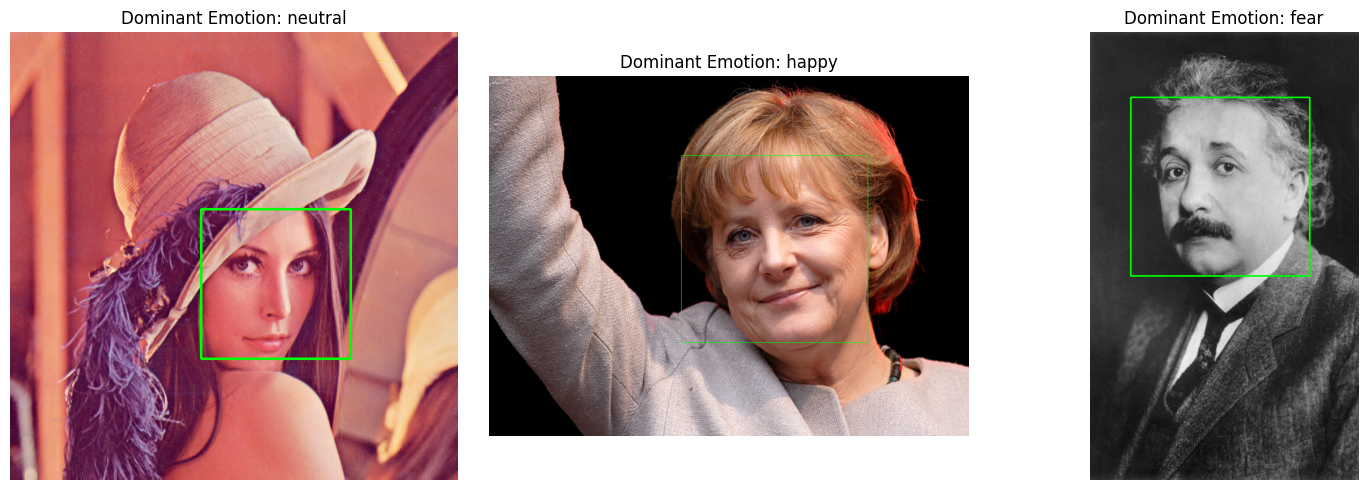

In [2]:
import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace

img0 = "./assets/lenna.png"
img1 = "./assets/angela-merkel.jpg"
img2 = "./assets/albert-einstein.jpg"

image_paths = [img0, img1, img2]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, path in enumerate(image_paths):
    image = cv2.imread(path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Backends: opencv, ssd, dlib, mtcnn, retinaface, mediapipe, yolov8, yunet, fastmtcnn
    objs = DeepFace.analyze(image_rgb, actions=['emotion'], detector_backend='opencv')
    emotion = objs[0]['dominant_emotion'][:]

    face_coordinates = objs[0]['region']
    x, y, w, h = face_coordinates['x'], face_coordinates['y'], face_coordinates['w'], face_coordinates['h']
    cv2.rectangle(image_rgb, (x, y), (x + w, y + h), (0, 255, 0), 2)
    axes[i].imshow(image_rgb)
    axes[i].axis('off')
    axes[i].set_title(f"Dominant Emotion: {emotion}")

plt.tight_layout()
plt.show()

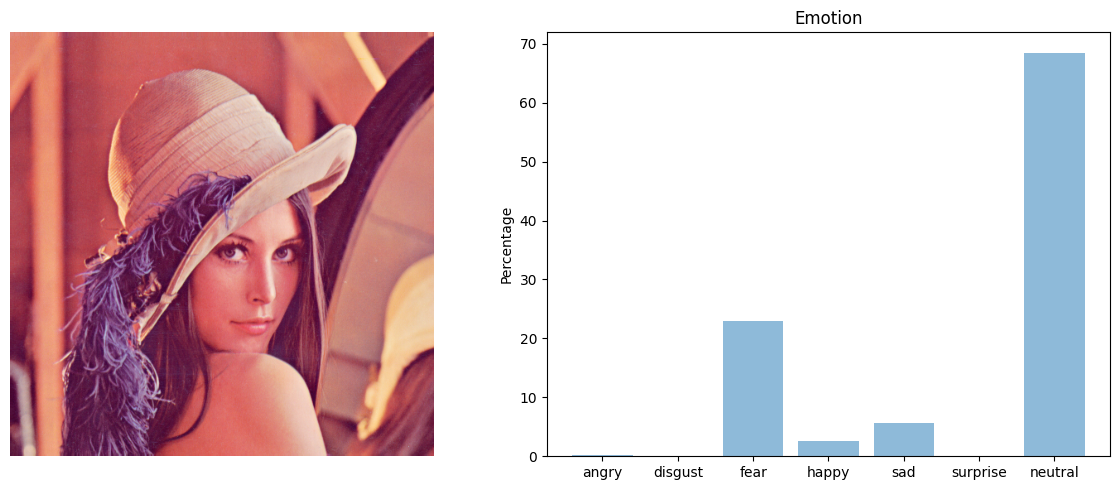

In [3]:
import numpy as np

img0 = "./assets/lenna.png"

image = cv2.imread(img0)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

emotions = DeepFace.analyze(image_rgb, actions=['emotion'], detector_backend='opencv')
emotion_values = list(emotions[0]['emotion'].values())

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.imshow(image_rgb)
ax1.axis('off')
objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
y_pos = np.arange(len(objects))

ax2.bar(y_pos, emotion_values, align='center', alpha=0.5)
ax2.set_xticks(y_pos)
ax2.set_xticklabels(objects)
ax2.set_ylabel('Percentage')
ax2.set_title('Emotion')

plt.tight_layout()
plt.show()

Since neutral has the highest score with around 70 % the face is classified as a neutral face.

## Use in our project

Instead of using emotions to trigger commands in our application we implemented emotion detection as a fun feature. The user can interact with a small ice bear emoji in the top right corner of the webcam while using the application. The ice bear will change its expression to the dominant emotion recognized on the user's face. The available emotions are: angry, fear, neutral, sad, disgust, happy and surprise.
<br/>
<div>
    <img src="./assets/emoji-overview.jpg" alt="Overview of emojis with photos" width="640"/>
</div>